# Telco Customer Churn.



## Context :

The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7043 customers in California in Q3.



## Objective :

The goal of this project is to try to predict the future behavior of client. By identifying those that could churn the company could take proactive retention actions.

The goal is to retain as many churning customers as possible, so recall is prioritized. False negatives (missed churners) cost more than false positives (false alerts).

## Libraries :

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats #
from scipy.stats import uniform, randint

# Model dev part :
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, f1_score, precision_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
from sklearn.metrics import classification_report

# Models :

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

## Data loading & Description :

### Composition of the tables :

CustomerID: A unique ID that identifies each customer.

Gender: The customer’s gender: Male, Female

Partner : Yes / No

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure : Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.


Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection : Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

### Load :

In [2]:
data = pd.read_csv('Telco_Churn_data.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Describe :

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* No missing value at first sight
* Wrong  type for TotalCharges
* Delete ID, it's not useful here


In [4]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') # NaN if missing
data.drop('customerID',axis=1,inplace=True)

In [5]:
data[data['TotalCharges'].isna()] # Is there any NaN now ?

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* Tenure = 0 for all of them and there are only 11 of them => Delete them.

In [6]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)

## EDA :

### Visualisation :

#### Univariate :

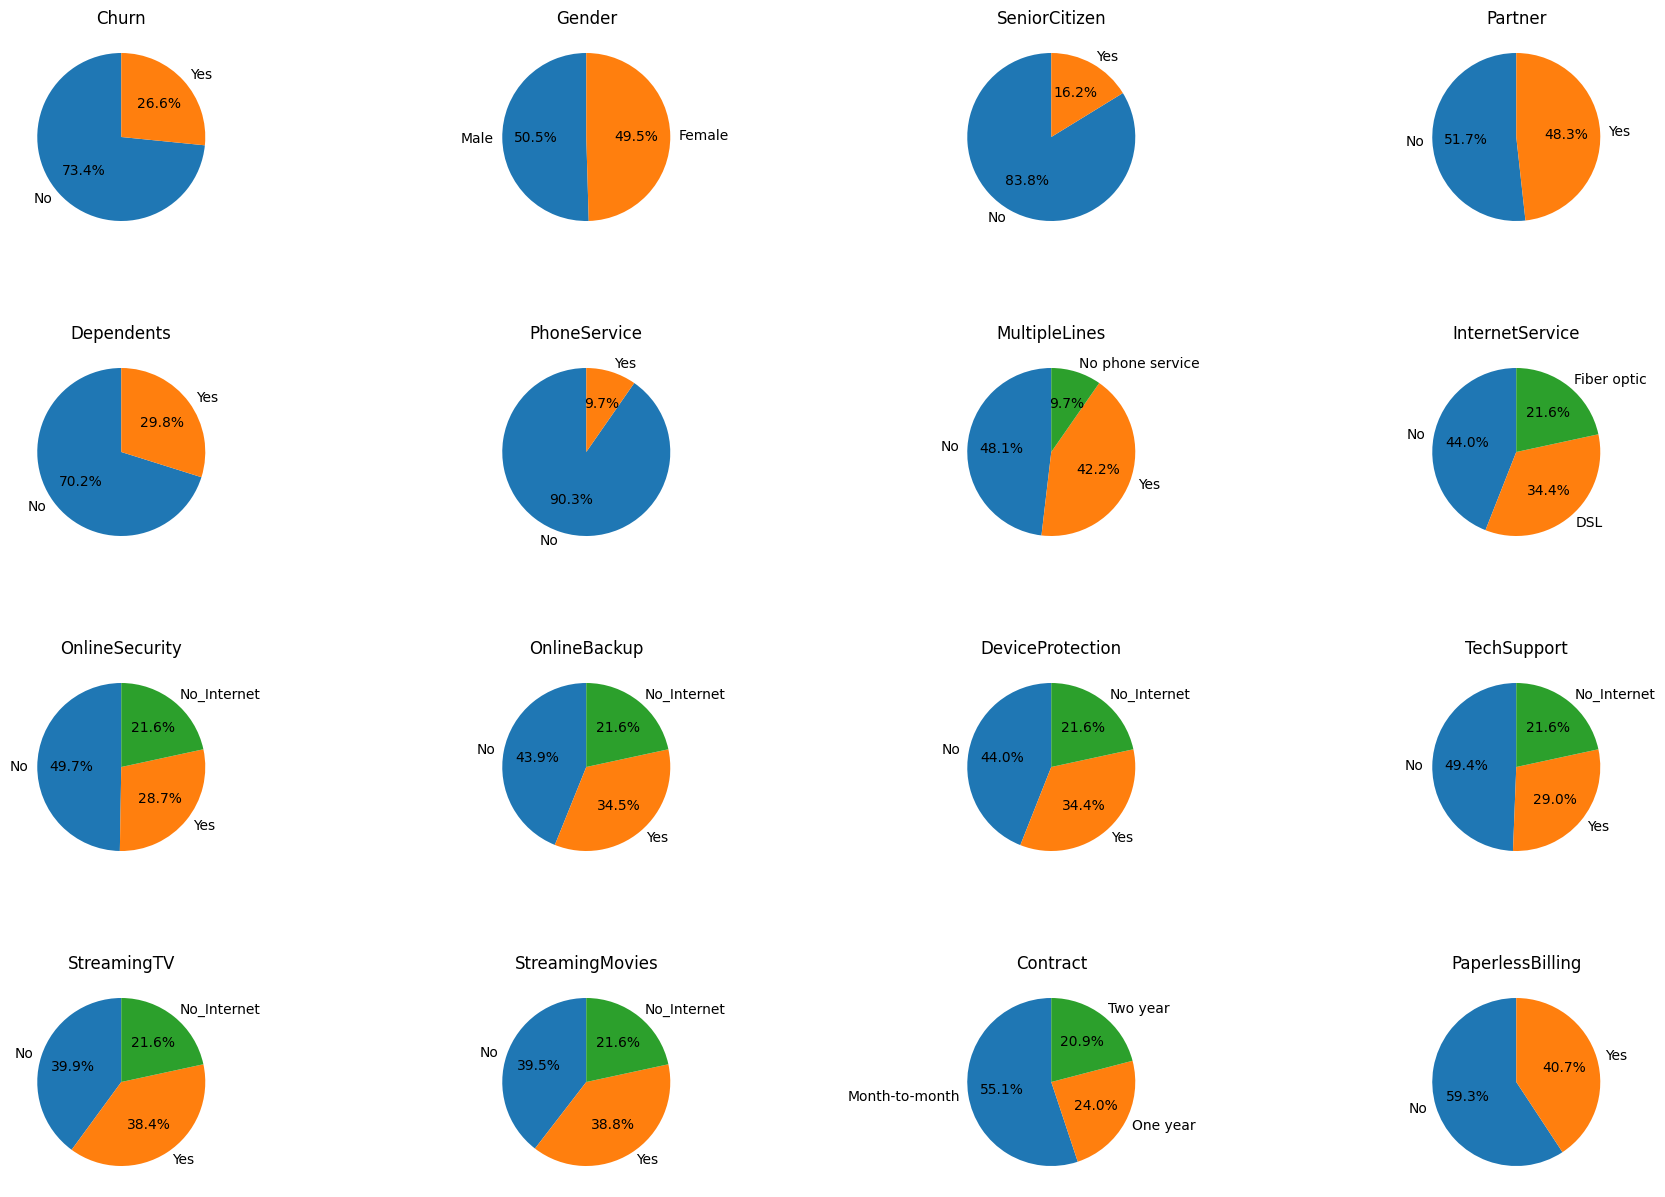

In [7]:
plt.figure(figsize=(22,15))

plt.subplot(4,4,1)
plt.pie(data['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90);
plt.title('Churn')

plt.subplot(4,4,2)
plt.pie(data['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',startangle=90);
plt.title('Gender')

plt.subplot(4,4,3)
plt.pie(data['SeniorCitizen'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90);
plt.title('SeniorCitizen');

plt.subplot(4,4,4)
plt.pie(data['Partner'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90);
plt.title('Partner');

plt.subplot(4,4,5)
plt.pie(data['Dependents'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90);
plt.title('Dependents');

plt.subplot(4,4,6)
plt.pie(data['PhoneService'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90);
plt.title('PhoneService');

plt.subplot(4,4,7)
plt.pie(data['MultipleLines'].value_counts(),labels=['No','Yes','No phone service'],autopct='%1.1f%%',startangle=90);
plt.title('MultipleLines');

plt.subplot(4,4,8)
plt.pie(data['InternetService'].value_counts(),labels=['No','DSL','Fiber optic'],autopct='%1.1f%%',startangle=90);
plt.title('InternetService');

plt.subplot(4,4,9)
plt.pie(data['OnlineSecurity'].value_counts(),labels=['No','Yes','No_Internet'],autopct='%1.1f%%',startangle=90);
plt.title('OnlineSecurity');

plt.subplot(4,4,10)
plt.pie(data['OnlineBackup'].value_counts(),labels=['No','Yes','No_Internet'],autopct='%1.1f%%',startangle=90);
plt.title('OnlineBackup');

plt.subplot(4,4,11)
plt.pie(data['DeviceProtection'].value_counts(),labels=['No','Yes','No_Internet'],autopct='%1.1f%%',startangle=90);
plt.title('DeviceProtection');

plt.subplot(4,4,12)
plt.pie(data['TechSupport'].value_counts(),labels=['No','Yes','No_Internet'],autopct='%1.1f%%',startangle=90);
plt.title('TechSupport');

plt.subplot(4,4,13)
plt.pie(data['StreamingTV'].value_counts(),labels=['No','Yes','No_Internet'],autopct='%1.1f%%',startangle=90);
plt.title('StreamingTV');

plt.subplot(4,4,14)
plt.pie(data['StreamingMovies'].value_counts(),labels=['No','Yes','No_Internet'],autopct='%1.1f%%',startangle=90);
plt.title('StreamingMovies');

plt.subplot(4,4,15)
plt.pie(data['Contract'].value_counts(),labels=['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle=90);
plt.title('Contract');

plt.subplot(4,4,16)
plt.pie(data['PaperlessBilling'].value_counts(),labels=['No','Yes'],autopct='%1.1f%%',startangle=90);
plt.title('PaperlessBilling');

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

Interpretations :

* 26% of churn, light imbalance it's ok. We could try a SMOTE but not necessary.
* Even gender repartition.
* Majority of Month-to-month contracts
* Only 10% of PhoneService.
* It doesn't look like there's any outliers in categorical features but we can see some redundancy in the features like MultipleLines and PhoneService (Delete it) or with the value 'No_internet'


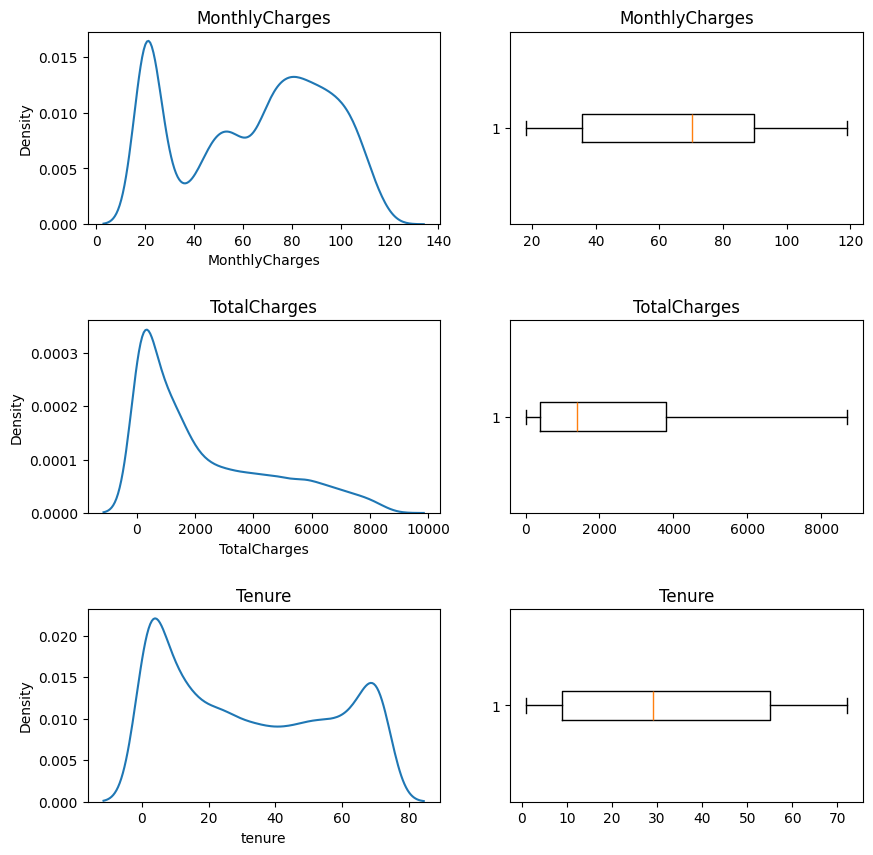

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.kdeplot(data['MonthlyCharges'])
plt.title('MonthlyCharges')

plt.subplot(3,2,2)
plt.boxplot(data['MonthlyCharges'],vert=False)
plt.title('MonthlyCharges')

plt.subplot(3,2,3)
sns.kdeplot(data['TotalCharges'])
plt.title('TotalCharges')

plt.subplot(3,2,4)
plt.boxplot(data['TotalCharges'],vert=False)
plt.title('TotalCharges')

plt.subplot(3,2,5)
sns.kdeplot(data['tenure'])
plt.title('Tenure')

plt.subplot(3,2,6)
plt.boxplot(data['tenure'],vert=False)
plt.title('Tenure')

plt.subplots_adjust(hspace=0.5)

#### Bivariate :

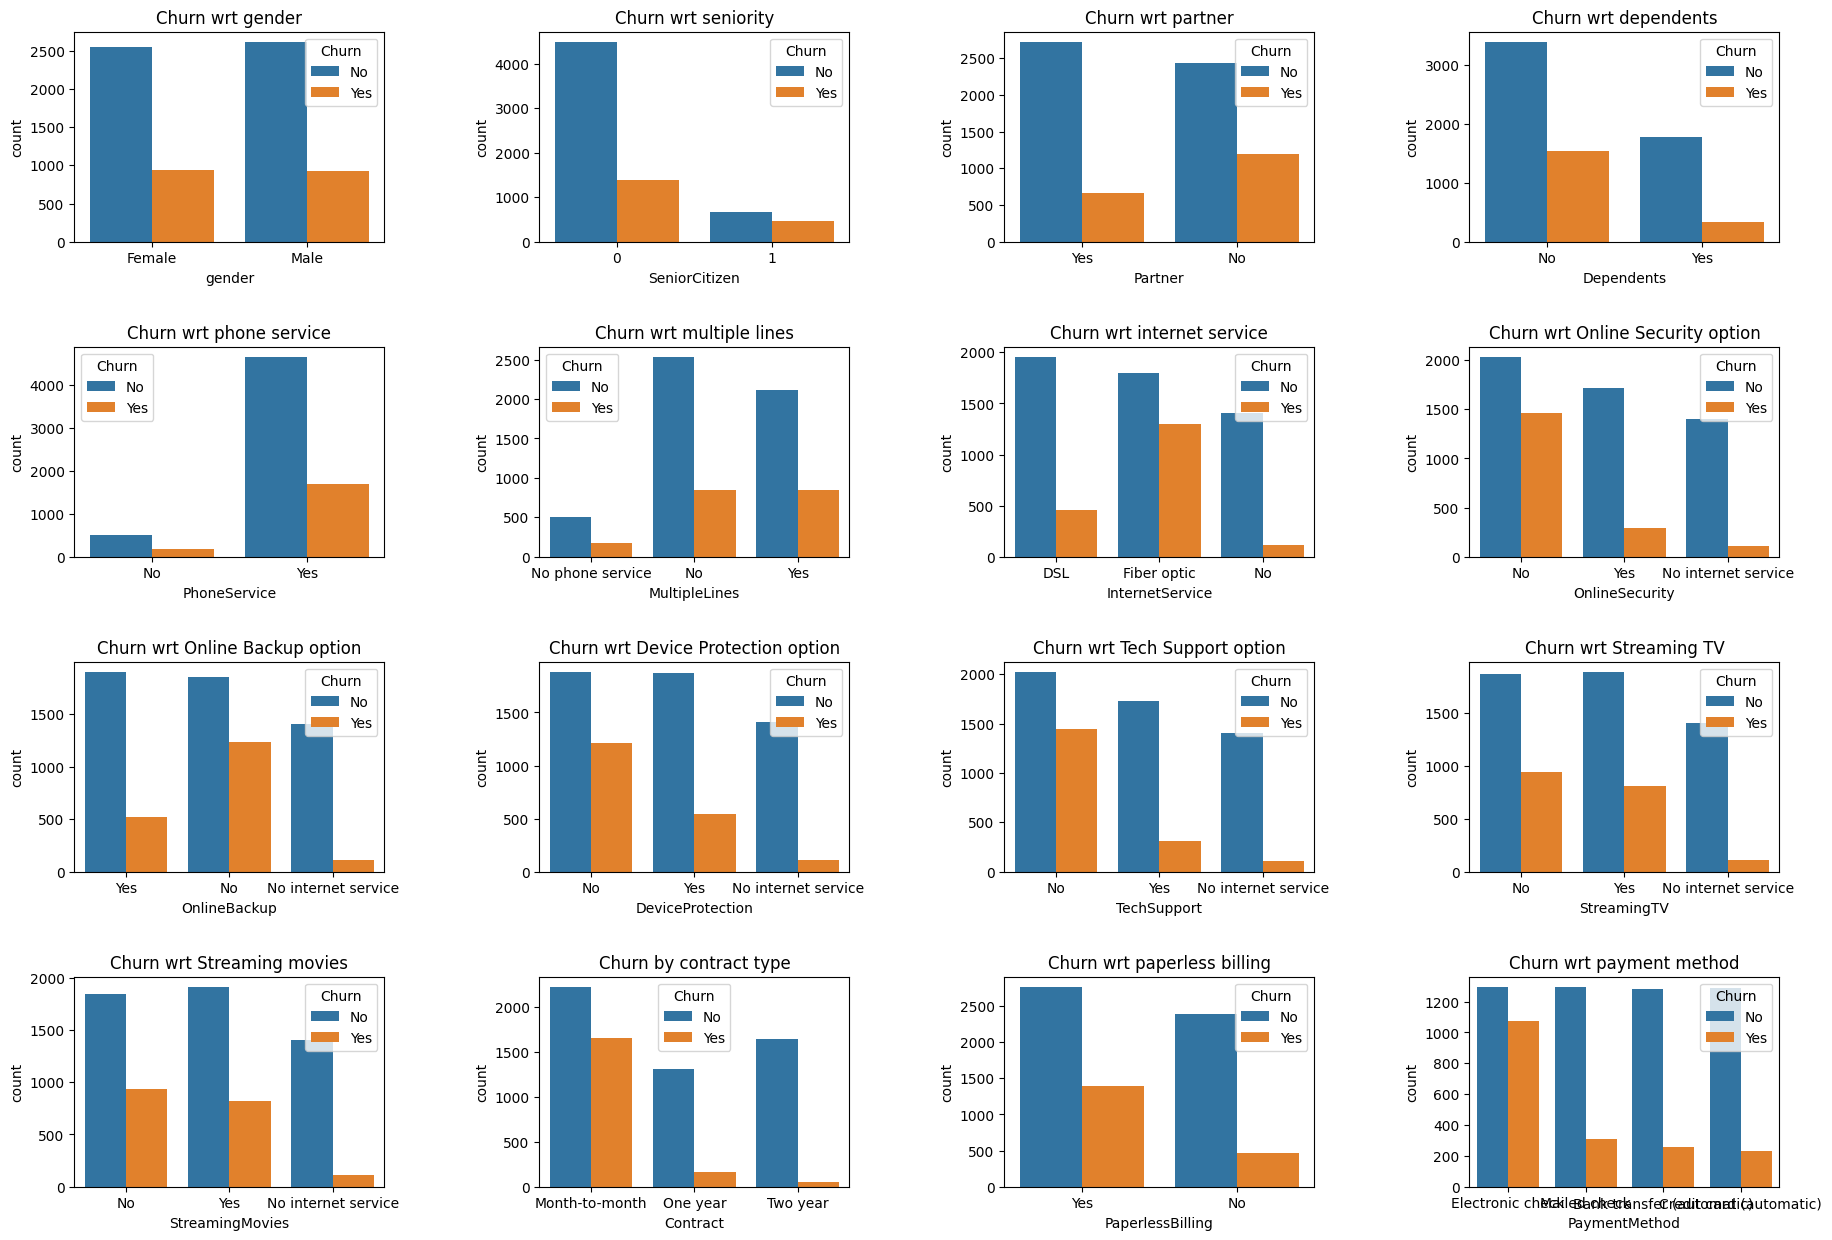

In [9]:
plt.figure(figsize=(22,15))

plt.subplot(4,4,1)
sns.countplot(x=data['gender'],hue=data['Churn'])
plt.title('Churn wrt gender');

plt.subplot(4,4,2)
sns.countplot(x=data['SeniorCitizen'],hue=data['Churn'])
plt.title('Churn wrt seniority');

plt.subplot(4,4,3)
sns.countplot(x=data['Partner'],hue=data['Churn'])
plt.title('Churn wrt partner');

plt.subplot(4,4,4)
sns.countplot(x=data['Dependents'],hue=data['Churn'])
plt.title('Churn wrt dependents');

plt.subplot(4,4,5)
sns.countplot(x=data['PhoneService'],hue=data['Churn'])
plt.title('Churn wrt phone service');

plt.subplot(4,4,6)
sns.countplot(x=data['MultipleLines'],hue=data['Churn'])
plt.title('Churn wrt multiple lines');

plt.subplot(4,4,7)
sns.countplot(x=data['InternetService'],hue=data['Churn'])
plt.title('Churn wrt internet service');

plt.subplot(4,4,8)
sns.countplot(x=data['OnlineSecurity'],hue=data['Churn'])
plt.title('Churn wrt Online Security option');

plt.subplot(4,4,9)
sns.countplot(x=data['OnlineBackup'],hue=data['Churn'])
plt.title('Churn wrt Online Backup option');

plt.subplot(4,4,10)
sns.countplot(x=data['DeviceProtection'],hue=data['Churn'])
plt.title('Churn wrt Device Protection option');

plt.subplot(4,4,11)
sns.countplot(x=data['TechSupport'],hue=data['Churn'])
plt.title('Churn wrt Tech Support option');

plt.subplot(4,4,12)
sns.countplot(x=data['StreamingTV'],hue=data['Churn'])
plt.title('Churn wrt Streaming TV');

plt.subplot(4,4,13)
sns.countplot(x=data['StreamingMovies'],hue=data['Churn'])
plt.title('Churn wrt Streaming movies');

plt.subplot(4,4,14)
sns.countplot(x=data['Contract'],hue=data['Churn'])
plt.title('Churn by contract type');

plt.subplot(4,4,15)
sns.countplot(x=data['PaperlessBilling'],hue=data['Churn'])
plt.title('Churn wrt paperless billing');

plt.subplot(4,4,16)
sns.countplot(x=data['PaymentMethod'],hue=data['Churn'])
plt.title('Churn wrt payment method');

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

Interpretations :

* A high part of the Senior Citizen churn.
* Those with a partner or dependents are less likely to churn
* Fiber Optic, No online security, backup and no device protection seems to be linked to the decision of churners.
* Most of the churners are month-to-month contractors or pay with Electronic check.

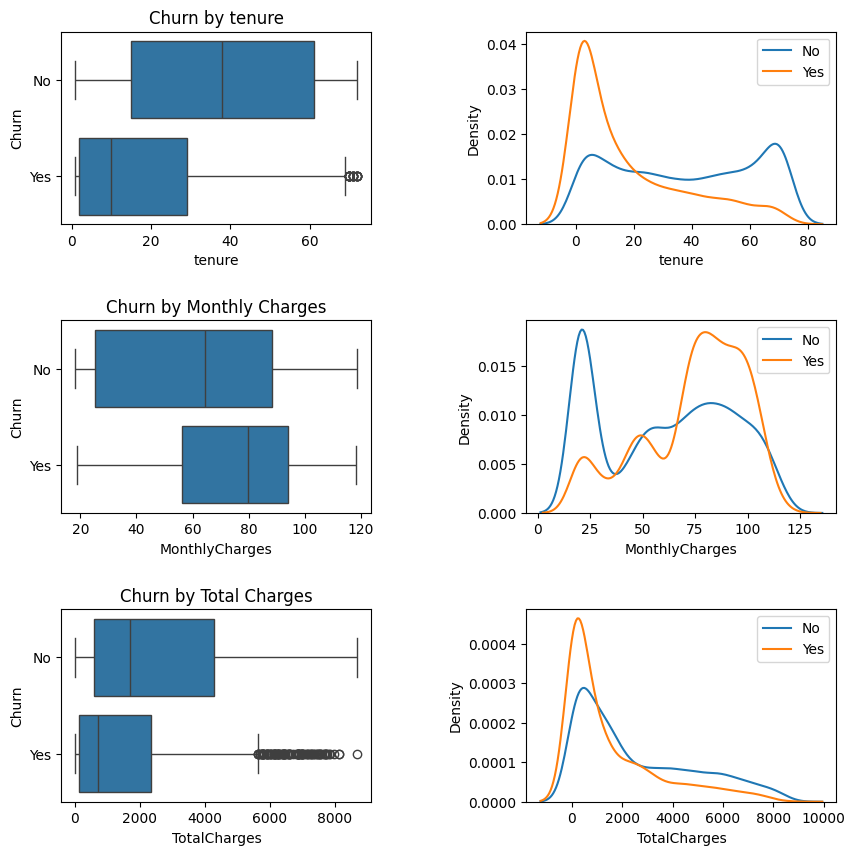

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
sns.boxplot(x=data['tenure'],y=data['Churn'])
plt.title('Churn by tenure');

plt.subplot(3,2,2)
sns.kdeplot(data[data['Churn']=='No']['tenure'],label='No')
sns.kdeplot(data[data['Churn']=='Yes']['tenure'],label='Yes')
plt.legend();

plt.subplot(3,2,3)
sns.boxplot(x=data['MonthlyCharges'],y=data['Churn'])
plt.title('Churn by Monthly Charges');

plt.subplot(3,2,4)
sns.kdeplot(data[data['Churn']=='No']['MonthlyCharges'],label='No')
sns.kdeplot(data[data['Churn']=='Yes']['MonthlyCharges'],label='Yes')
plt.legend();

plt.subplot(3,2,5)
sns.boxplot(x=data['TotalCharges'],y=data['Churn'])
plt.title('Churn by Total Charges');

plt.subplot(3,2,6)
sns.kdeplot(data[data['Churn']=='No']['TotalCharges'],label='No')
sns.kdeplot(data[data['Churn']=='Yes']['TotalCharges'],label='Yes')
plt.legend();

plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)

Interpretations :

* High churn rate amongst new clients (low tenure) and amongst those with high monthly charges.
* Those that churn leave fast and don't pay much on a global scale.

### Data pre-processing :

In [11]:
data.drop('PhoneService',axis=1,inplace=True)

# Convert binary from object to int
data['gender'] = (data['gender'] == 'Male').astype('int64') #Binary
data['Partner'] = (data['Partner'] == 'Yes').astype('int64')
data['Dependents'] = (data['Dependents'] == 'Yes').astype('int64')
data['PaperlessBilling'] = (data['PaperlessBilling'] == 'Yes').astype('int64')
data['Churn'] = (data['Churn'] == 'Yes').astype('int64')

data_dum=pd.get_dummies(data,dtype=int)
data_dum.columns # Many redundancies like 'No_internet_service'

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (a

In [12]:
data_dum.drop(['OnlineSecurity_No internet service','OnlineBackup_No internet service','DeviceProtection_No internet service',
           'TechSupport_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'],axis=1,inplace=True)
data_dum.columns # Some are now binary 'Yes / No' no more third option as it's counted in InternetService_No

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_Yes', 'DeviceProtection_No', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [13]:
data_dum.drop(['OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No',
           'TechSupport_No','StreamingTV_No','StreamingMovies_No','MultipleLines_No'],axis=1,inplace=True) # Delete the 'No' feature
data_dum.rename(columns={'OnlineSecurity_Yes' :'OnlineSecurity','OnlineBackup_Yes' :'OnlineBackup','DeviceProtection_Yes' :'DeviceProtection',
                         'TechSupport_Yes' :'TechSupport','StreamingTV_Yes' :'StreamingTV','StreamingMovies_Yes' :'StreamingMovies','MultipleLines_Yes' : 'MultipleLines'},inplace=True) # Rename the 'Yes' feature
data_dum.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'MultipleLines_No phone service', 'MultipleLines',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Correlation :

<Axes: >

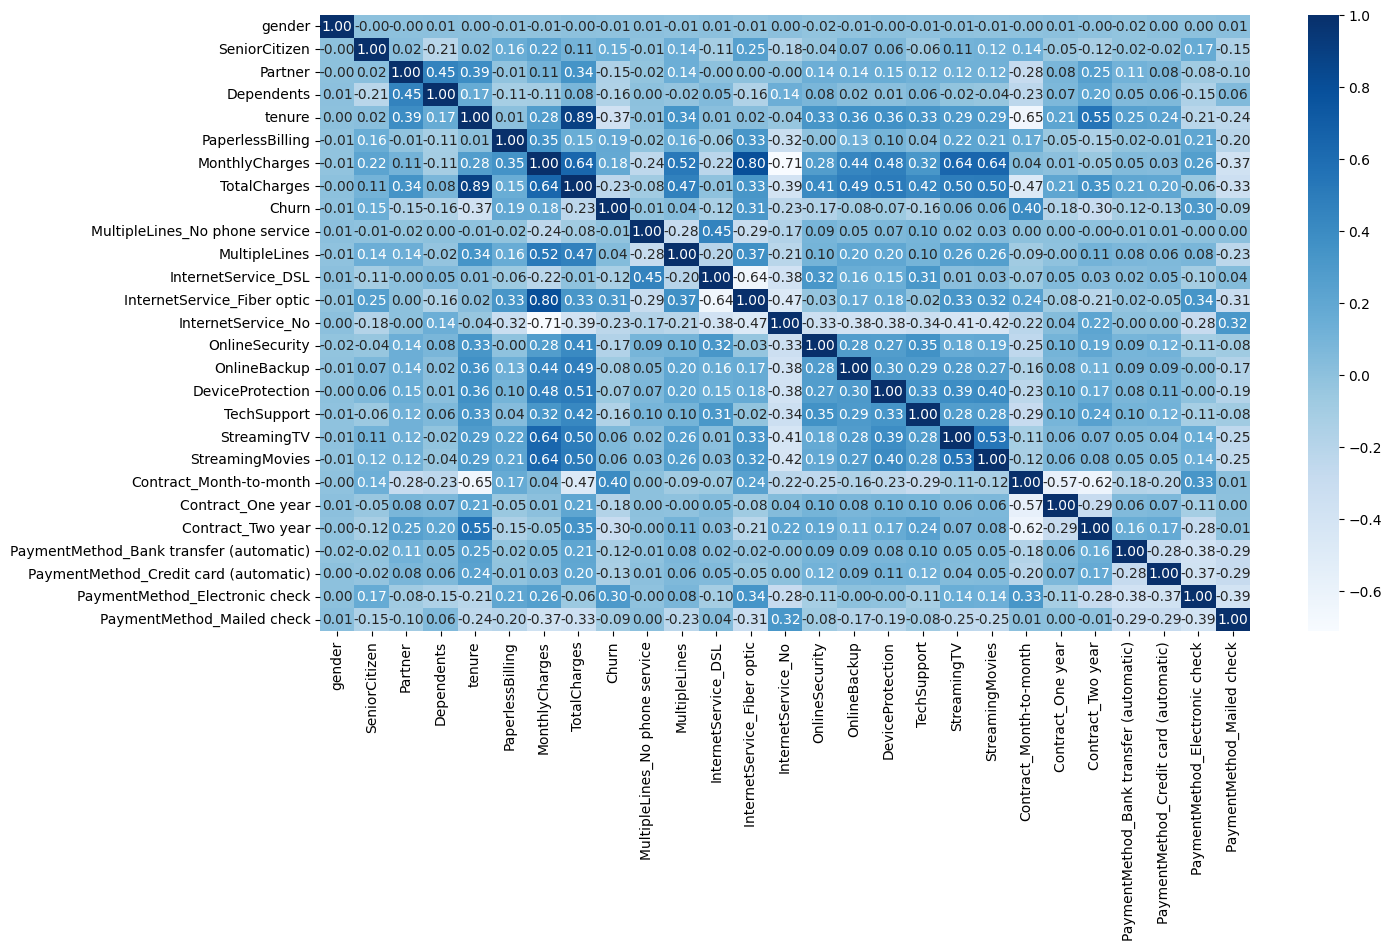

In [14]:
corr=data_dum.corr('spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr,cmap='Blues',annot=True,fmt='.2f')

<Axes: xlabel='Churn'>

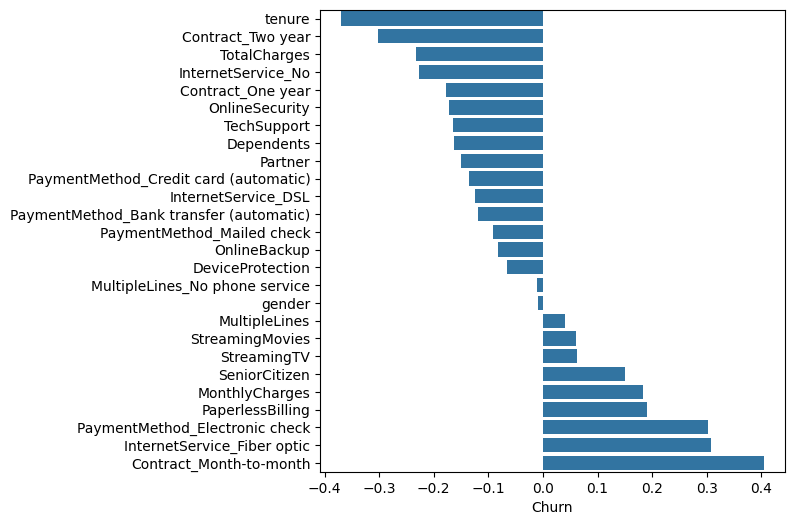

In [15]:
plt.figure(figsize=(6,6))
sns.barplot(corr['Churn'].sort_values()[:-1],orient='h')

Interpretations :
* High correlation with Contract month to month and tenure as we though in the visualisation

## Modelisation :

In [16]:
# Séparation train / test :
X_train, X_test, y_train, y_test = train_test_split(data_dum.drop('Churn',axis=1),data_dum['Churn'],test_size=0.20,random_state=1,shuffle=True) #80/20

# On scale les variables numeriques : tenure, MonthlyCharges, TotalCharges
num = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler=StandardScaler()
X_train[num] = scaler.fit_transform(X_train[num])
X_test[num] = scaler.transform(X_test[num])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

### Baseline

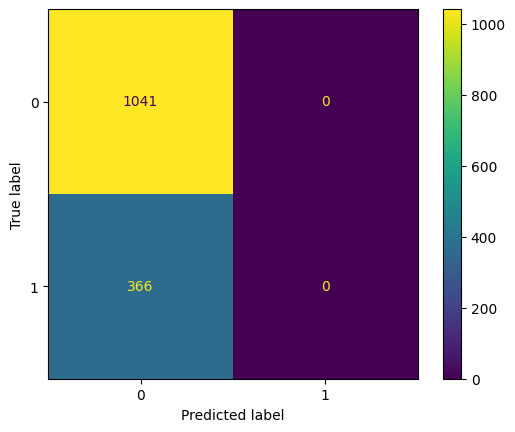

In [ ]:
base = 0*y_test  # Baseline will be the case where we don't care if they churn or not, nobody is a churner
ConfusionMatrixDisplay(confusion_matrix(y_test,base)).plot()

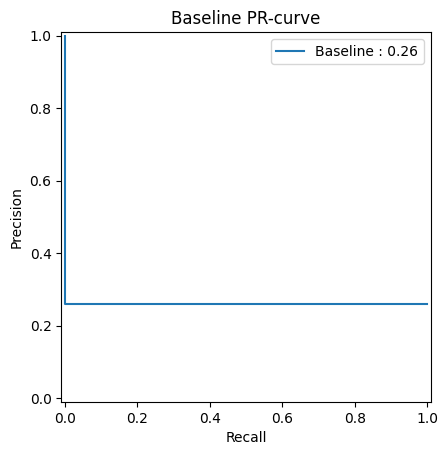

In [ ]:
# Calculate precision for each threshold
precision, recall, thresholds = precision_recall_curve(y_test, 0*y_test)

# Trace la courbe
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Baseline PR-curve')
plt.legend(['Baseline : '+str(round(average_precision_score(y_test,0*y_test),2))])
plt.show()

In [ ]:
print(classification_report(y_test,0*y_test,zero_division=0.0));

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1041
           1       0.00      0.00      0.00       366

    accuracy                           0.74      1407
   macro avg       0.37      0.50      0.43      1407
weighted avg       0.55      0.74      0.63      1407



### Hyperparameters optimisation :

In [ ]:
def cv(model,distrib,X=X_train,y=y_train,n_cv=5,n_iter=50,sample_frac=1) :
    if sample_frac < 1.0:
      sample_idx = np.random.choice(len(X), int(len(X)*sample_frac), replace=False)
      X = X.iloc[sample_idx]
      y = y.iloc[sample_idx]
    process = RandomizedSearchCV(estimator=model, param_distributions=distrib, n_iter=n_iter, scoring="recall", cv=n_cv, verbose=0, n_jobs=-1, random_state=1)
    process.fit(X,y)
    return process.best_params_, process.best_score_

#### First optimization :

* n_iter=20
* n_cv=3
* sample_frac=0.5

In [ ]:
# Define the differents models and there distribution for RandomCV :

reglog=LogisticRegression()
reglog_distrib = {'C': uniform(0.0001,100), 'max_iter': [100, 200, 500]}

knn=KNeighborsClassifier()
knn_distrib = {'n_neighbors' : randint(3,20), 'weights' : ['uniform','distance'],}

svc = SVC()
svc_distrib = {'C': uniform(0.0001,100), 'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'coef0': uniform(0,1)}

rf = RandomForestClassifier()
rf_distrib = {'n_estimators' : randint(50,501), 'max_depth':[None, 10, 20, 30, 50], 'min_samples_split': randint(2,11),
           'min_samples_leaf': randint(1,6), 'max_features':["sqrt", "log2", None]}

xgb = XGBClassifier()
xgb_distrib = {'n_estimators' : randint(50,501), 'max_depth': randint(1,11), 'subsample': uniform(0.5,0.5), 'learning_rate' : uniform(0.001,0.3), 'colsample_bytree': uniform(0.5,0.5),
            'gamma' : uniform(0,5), 'reg_alpha' : uniform(0.1,10), 'reg_lambda' : uniform(0.1,10)}


models = [reglog, knn, svc, rf, xgb]
distribs = [reglog_distrib, knn_distrib, svc_distrib, rf_distrib, xgb_distrib]
model_names= ['Logistic Reg','KNN','SVC','RandomForest','Xgboost']

In [ ]:
params_fin=dict()
res_fin=dict()
for (model, distrib, model_name) in zip(models,distribs,model_names) :
    print(model_name)
    param, score=cv(model,distrib,n_cv=3,n_iter=20,sample_frac=0.5)
    params_fin[model_name]=param
    res_fin[model_name]=score

Logistic Reg
KNN
SVC
RandomForest
Xgboost


In [ ]:
params_fin

{'Logistic Reg': {'C': np.float64(41.702300470257406), 'max_iter': 100},
 'KNN': {'n_neighbors': 13, 'weights': 'uniform'},
 'SVC': {'C': np.float64(90.85965030930956),
  'coef0': np.float64(0.2936141483736795),
  'gamma': 'auto',
  'kernel': 'rbf'},
 'RandomForest': {'max_depth': 10,
  'max_features': None,
  'min_samples_leaf': 3,
  'min_samples_split': 10,
  'n_estimators': 72},
 'Xgboost': {'colsample_bytree': np.float64(0.930013974341444),
  'gamma': np.float64(2.6941553217082643),
  'learning_rate': np.float64(0.16684659360572976),
  'max_depth': 8,
  'n_estimators': 194,
  'reg_alpha': np.float64(2.4362252324211355),
  'reg_lambda': np.float64(1.015564416778033),
  'subsample': np.float64(0.7850333302080472)}}

#### Second Optimization :
* n_cv=5
* n_iter=50
* sample_frac=1

In [ ]:
reglog=LogisticRegression(max_iter=100)
reglog_distrib = {'C': uniform(40,5)}

knn=KNeighborsClassifier(weights='uniform')
knn_distrib = {'n_neighbors' : randint(8,20)}

svc = SVC(gamma='auto',kernel='rbf')
svc_distrib = {'C': uniform(90,20)}

rf = RandomForestClassifier(max_features=None)
rf_distrib = {'n_estimators' : randint(50,200), 'max_depth': randint(5,13), 'min_samples_split': randint(7,13),
           'min_samples_leaf': randint(1,6)}

xgb = XGBClassifier()
xgb_distrib = {'n_estimators' : randint(150,250), 'max_depth': randint(3,10), 'subsample': uniform(0.6,0.3), 'learning_rate' : uniform(0.05,0.2), 'colsample_bytree': uniform(0.79,0.2),
            'gamma' : uniform(1,3), 'reg_alpha' : uniform(1.5,2), 'reg_lambda' : uniform(0.5,2)}


models = [reglog, knn, svc, rf, xgb]
distribs = [reglog_distrib, knn_distrib, svc_distrib, rf_distrib, xgb_distrib]
model_names= ['Logistic Reg','KNN','SVC','RandomForest','Xgboost']

In [ ]:
params=dict()
res=dict()
for (model, distrib, model_name) in zip(models,distribs,model_names) :
    print(model_name)
    param, score=cv(model,distrib,n_cv=5,n_iter=50)
    params[model_name]=param
    res[model_name]=score

Logistic Reg
KNN
SVC
RandomForest
Xgboost


In [ ]:
import joblib

# Save the optimized parameters to a file
joblib.dump(params, "optimized_params.pkl")

['optimized_params.pkl']

### Fit optimized models :

In [21]:
import joblib
params= joblib.load("optimized_params.pkl")

In [22]:
# Models optimisés :
reglog = LogisticRegression(**params['Logistic Reg'])

knn = KNeighborsClassifier(**params['KNN'])

svc = SVC(**params['SVC'],probability=True)

rf = RandomForestClassifier(**params['RandomForest'])

xgb = XGBClassifier(**params['Xgboost'])

models = [reglog, knn, svc, rf,xgb]
model_names=['Logistic Reg','KNN','SVC','RandomForest','Xgboost']

In [23]:
for model,model_name in zip(models,model_names) : # Entrainement des modeles optimisés
  model.fit(X_train,y_train)

### Model evaluation and selection :

In [24]:
acc=[]
rec=[]
f1=[]
ap_pr=[]
prec=[]
for model,model_name in zip(models,model_names) :
  y_pred=model.predict(X_test)
  print(model_name, classification_report(y_test,y_pred),'\n')
  acc.append(accuracy_score(y_test,y_pred))
  rec.append(recall_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred))
  prec.append(precision_score(y_test,y_pred))
  y_prob = model.predict_proba(X_test)[:,1]
  ap_pr.append(average_precision_score(y_test,y_prob))

acc.append(accuracy_score(y_test,0*y_test))
rec.append(recall_score(y_test,0*y_test))
f1.append(f1_score(y_test,0*y_test))
prec.append(precision_score(y_test,0*y_test))
ap_pr.append(average_precision_score(y_test,0*y_test))


Logistic Reg               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1041
           1       0.63      0.54      0.58       366

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407
 

KNN               precision    recall  f1-score   support

           0       0.85      0.86      0.86      1041
           1       0.59      0.56      0.58       366

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.72      1407
weighted avg       0.78      0.78      0.78      1407
 

SVC               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1041
           1       0.51      0.54      0.52       366

    accuracy                           0.74      1407
   macro avg       0.67      0.68      0.67      1407
weighted avg       0.75      0.74      0.75      

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


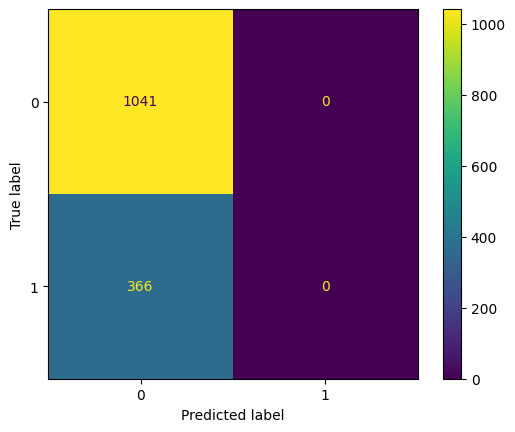

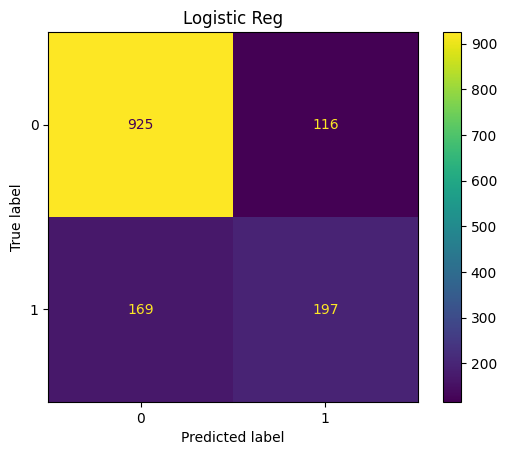

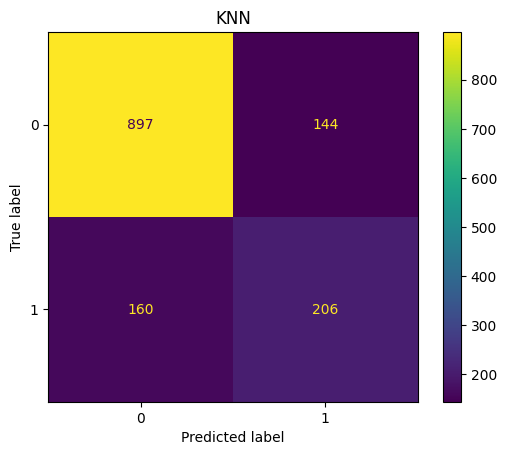

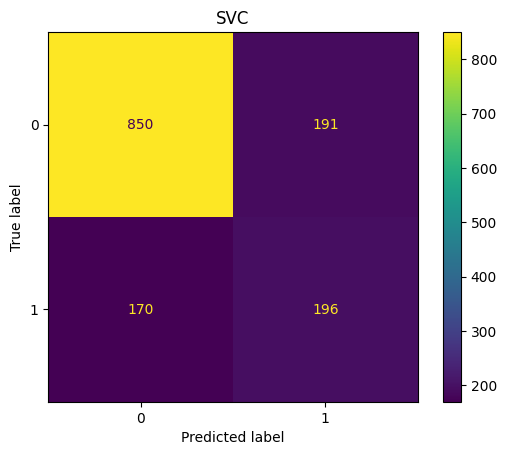

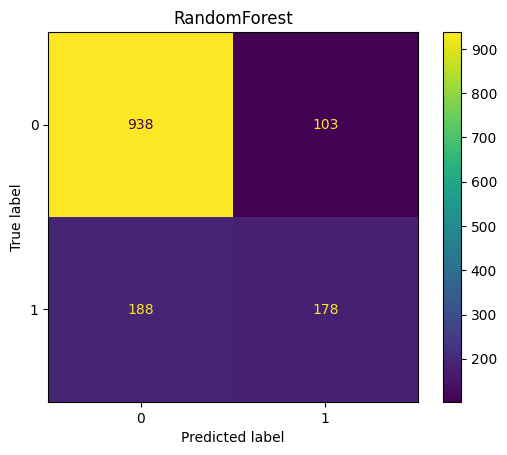

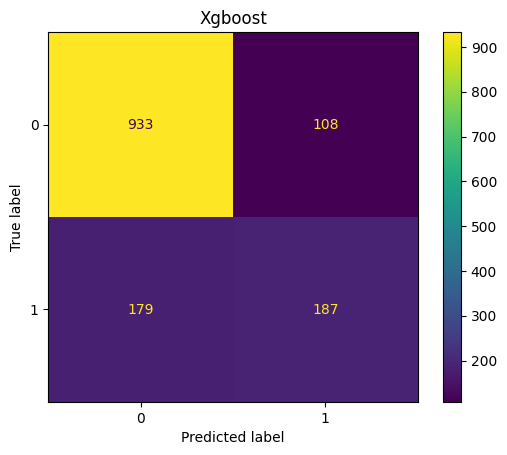

In [25]:
# Confusion matrix for baseline :
ConfusionMatrixDisplay(confusion_matrix(y_test,0*y_test)).plot()

for model,model_name in zip(models,model_names) :
  ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
  plt.title(model_name)

In [26]:
leg = list()
precision = dict()
recall = dict()
thresholds = dict()
average_precision = dict()

for i, model, model_name in zip(range(len(model_names)),models, model_names) :
    y_prob = model.predict_proba(X_test)[:,1]
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test, y_prob)
    average_precision[i] = average_precision_score(y_test, y_prob)
    leg.append(model_name + ' : ' + str(round(average_precision_score(y_test,y_prob),4)))


precision[i+1], recall[i+1], thresholds[i+1] = precision_recall_curve(y_test, 0*y_test)
average_precision[i+1] = average_precision_score(y_test, 0*y_test)
leg.append('Baseline : '+str(round(average_precision_score(y_test,0*y_test),2)))

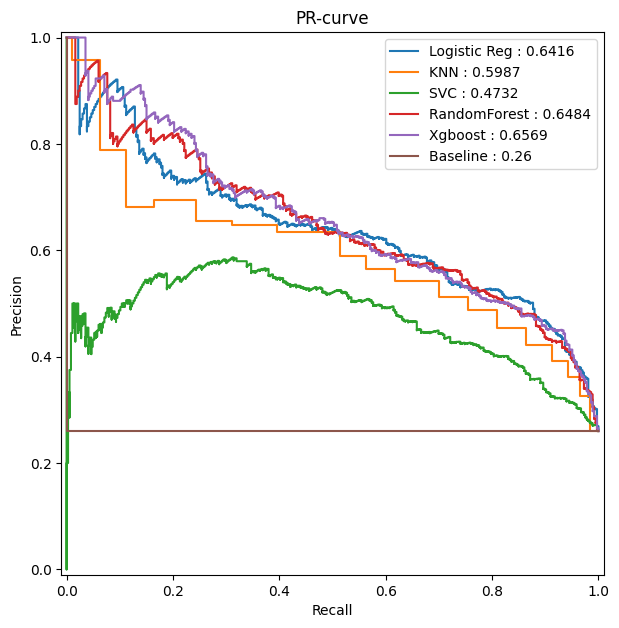

In [27]:
# Add baseline :
model_names.append('Baseline')

_, ax = plt.subplots(figsize=(7, 8))

for i in range(len(model_names)) :
  display = PrecisionRecallDisplay(
      recall=recall[i],
      precision=precision[i],
      average_precision=average_precision[i],
  )
  display.plot(
       ax=ax, despine=False
  )
ax.legend(leg)
plt.title('PR-curve')
plt.show()

In [28]:
results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1': f1,
    'Average Precision Score': ap_pr
})
results.sort_values(by='Average Precision Score', ascending=False)

,Model,Accuracy,Recall,Precision,F1,Average Precision Score
4,Xgboost,0.796020,0.510929,0.633898,0.565809,0.656853
3,RandomForest,0.793177,0.486339,0.633452,0.550232,0.648375
0,Logistic Reg,0.797441,0.538251,0.629393,0.580265,0.641560
1,KNN,0.783937,0.562842,0.588571,0.575419,0.598694
2,SVC,0.743426,0.535519,0.506460,0.520584,0.473170
5,Baseline,0.739872,0.000000,0.000000,0.000000,0.260128


Conclusions : We have a very low recall (56% at most but with bad AP or 51%).
Let's try to change the threshold

### Changing the threshold :

Let's try to have a Recall around 0.7 - 0.8 even if the Precision go down to around 0.3 - 0.4 (at most).

This choice is based on the fact that retaining a customer cost less than acquiring a new one.

In [124]:
# keep only reg log rf and xgboost :
r = [recall[i] for i in [0,3,4]]
p = [precision[i] for i in [0,3,4]]
t = [thresholds[i] for i in [0,3,4]]
l = [leg[i] for i in [0,3,4]]
m = [model_names[i] for i in [0,3,4]]
mo = [models[i] for i in [0,3,4]]

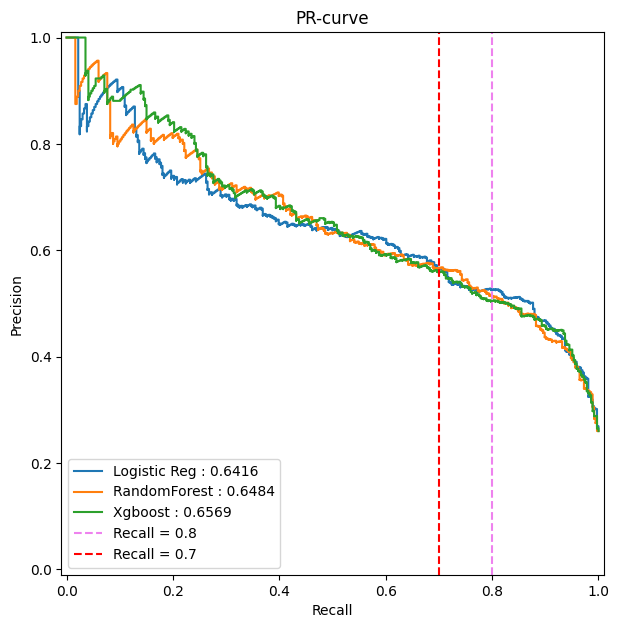

In [74]:
_, ax = plt.subplots(figsize=(7, 8))

for i in range(3) :
  display = PrecisionRecallDisplay(
      recall=r[i],
      precision=p[i],
      average_precision=a[i],
  )
  display.plot(
       ax=ax, despine=False
  )
plt.axvline(x=0.8, color='violet', linestyle='--', label='Target Recall = 0.8')
plt.axvline(x=0.7, color='r', linestyle='--', label='Target Recall = 0.7')
ax.legend(l+['Recall = 0.8', 'Recall = 0.7'])
plt.title('PR-curve')
plt.show()

In [78]:
# For a target recall = 0.7 or 0.8
t1 = 0.7
t2 = 0.8

for i in range(3) :
  print(m[i])
  opti1 = np.argmin(r[i] >= t1)
  opti2 = np.argmin(r[i] >= t2)
  print(f"For a Target recall = {t1}:")
  print(f"  - Precision = {p[i][opti1]:.2f}")
  print(f"  - Threshold = {t[i][opti1]:.2f}")

  print(f"For a Target recall = {t2}:")
  print(f"  - Precision = {p[i][opti2]:.2f}")
  print(f"  - Threshold = {t[i][opti2]:.2f}")
  print('\n')

Logistic Reg
For a Target recall = 0.7:
  - Precision = 0.56
  - Threshold = 0.38
For a Target recall = 0.8:
  - Precision = 0.53
  - Threshold = 0.29


RandomForest
For a Target recall = 0.7:
  - Precision = 0.57
  - Threshold = 0.36
For a Target recall = 0.8:
  - Precision = 0.51
  - Threshold = 0.28


Xgboost
For a Target recall = 0.7:
  - Precision = 0.56
  - Threshold = 0.35
For a Target recall = 0.8:
  - Precision = 0.50
  - Threshold = 0.27




In [97]:
thresh = dict()
thresh[m[0]] = [0.38,0.29]
thresh[m[1]] = [0.36,0.28]
thresh[m[2]] = [0.35,0.27]

In [101]:
prob = dict()
pred07 = dict()
pred08 = dict()

for i in range(3) :
  prob[m[i]] = mo[i].predict_proba(X_test)[:,1]
  pred07[m[i]] = prob[m[i]] >= thresh[m[i]][0]
  pred08[m[i]] = prob[m[i]] >= thresh[m[i]][1]

In [147]:
# For a recall = 0.7 :
acc_07=[]
rec_07=[]
f1_07=[]
prec_07=[]

# For a recall = 0.8
acc_08=[]
rec_08=[]
f1_08=[]
prec_08=[]

for i in range(2) : # Either recall 0.7 or 0.8
  for model,model_name in zip(mo,m) :
    y_pred=pred07[model_name] if i==0 else pred08[model_name]
    acc_07.append(accuracy_score(y_test,y_pred)) if i==0 else acc_08.append(accuracy_score(y_test,y_pred))
    rec_07.append(recall_score(y_test,y_pred)) if i==0 else rec_08.append(recall_score(y_test,y_pred))
    f1_07.append(f1_score(y_test,y_pred)) if i==0 else f1_08.append(f1_score(y_test,y_pred))
    prec_07.append(precision_score(y_test,y_pred)) if i==0 else prec_08.append(precision_score(y_test,y_pred))

In [160]:
results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': acc,
    'Recall': rec,
    'Precision': prec,
    'F1': f1,
    'Threshold' : [0.5]*6
})

results_07 = pd.DataFrame({
    'Model': [model_names[i]+"07" for i in [0,3,4]],
    'Accuracy': acc_07,
    'Recall': rec_07,
    'Precision': prec_07,
    'F1': f1_07,
    'Threshold' : [thresh[m[i]][0] for i in range(3)]
})

results_08 = pd.DataFrame({
    'Model': [model_names[i]+"08" for i in [0,3,4]],
    'Accuracy': acc_08,
    'Recall': rec_08,
    'Precision': prec_08,
    'F1': f1_08,
    'Threshold' : [thresh[m[i]][1] for i in range(3)]
})

In [170]:
results_tot = pd.concat([results,results_07,results_08])
results_tot.sort_values(by=['Recall','Precision'], ascending=False,inplace=True)
results_tot = results_tot.reset_index(drop=True)
results_tot

,Model,Accuracy,Recall,Precision,F1,Threshold
0,Logistic Reg08,0.759773,0.806011,0.524911,0.635776,0.29
1,Xgboost08,0.743426,0.797814,0.504318,0.617989,0.27
2,RandomForest08,0.751244,0.795082,0.514134,0.624464,0.28
3,Xgboost07,0.778962,0.704918,0.559653,0.623942,0.35
4,RandomForest07,0.782516,0.702186,0.566079,0.626829,0.36
5,Logistic Reg07,0.783227,0.696721,0.567929,0.625767,0.38
6,KNN,0.783937,0.562842,0.588571,0.575419,0.50
7,Logistic Reg,0.797441,0.538251,0.629393,0.580265,0.50
8,SVC,0.743426,0.535519,0.506460,0.520584,0.50
9,Xgboost,0.796020,0.510929,0.633898,0.565809,0.50


## Conclusion :

The best model amongst all of those we have is the Logistic Regression with a threshold around 0.29. We have a high recall (80%), and a relatively good tradeoff with precision (52%).

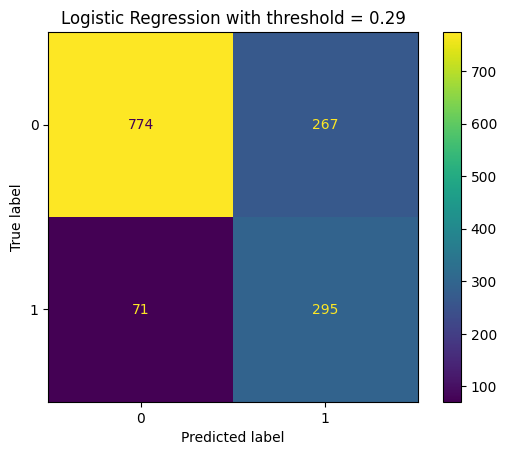

In [185]:
# Confusion matrix for Logistic Reg with threshold = 0.29 :
ConfusionMatrixDisplay.from_predictions(y_test,pred08['Logistic Reg'])
plt.title('Logistic Regression with threshold = 0.29');

### Different models' feature importance :

In [173]:
# For Logistic regression :
weights = pd.Series(reglog.coef_[0],
                 index=X_train.columns.values)
top_10_lr=np.abs(weights).sort_values(ascending = False)[:10].index.values
weights[top_10_lr].sort_values(ascending = False)

,0
InternetService_Fiber optic,1.334798
StreamingMovies,0.725047
TotalCharges,0.700328
StreamingTV,0.689142
InternetService_DSL,-0.565786
PaymentMethod_Mailed check,-0.574334
Contract_Two year,-1.305267
MonthlyCharges,-1.374944
tenure,-1.475880
InternetService_No,-2.449047


In [174]:
# For XGBoost :
feat_imp_xgb=pd.DataFrame(xgb.get_booster().get_score(importance_type='gain'),index=['importance']).T
top_10_xgb=feat_imp_xgb.sort_values(ascending = False,by='importance')[:10].index.values
feat_imp_xgb.loc[top_10_xgb].sort_values(by='importance',ascending=False)

,importance
Contract_Month-to-month,218.505478
InternetService_Fiber optic,47.194271
Contract_Two year,24.300989
PaymentMethod_Electronic check,22.162857
TotalCharges,11.712452
Contract_One year,9.373144
StreamingMovies,9.358420
InternetService_DSL,8.788607
tenure,8.668102
PaperlessBilling,8.442133


In [175]:
# For Random Forest :
feat_imp_rf=pd.DataFrame(rf.feature_importances_,index=X_train.columns.values,columns=['importance'])
top_10_rf=feat_imp_rf.sort_values(ascending = False,by='importance')[:10].index.values
feat_imp_rf.loc[top_10_rf].sort_values(by='importance',ascending=False)

,importance
tenure,0.168344
TotalCharges,0.146087
MonthlyCharges,0.120856
Contract_Month-to-month,0.111095
InternetService_Fiber optic,0.073910
PaymentMethod_Electronic check,0.055663
Contract_Two year,0.045087
InternetService_No,0.026783
PaperlessBilling,0.022954
Contract_One year,0.019860


In [176]:
list_imp=list(top_10_rf)+list(top_10_xgb)+list(top_10_lr)

In [177]:
freq_series = pd.Series(list_imp).value_counts()
print(freq_series[freq_series>1]) #Those that are present more than once.

tenure                            3
TotalCharges                      3
InternetService_Fiber optic       3
Contract_Two year                 3
Contract_Month-to-month           2
MonthlyCharges                    2
PaymentMethod_Electronic check    2
InternetService_No                2
PaperlessBilling                  2
Contract_One year                 2
StreamingMovies                   2
InternetService_DSL               2
Name: count, dtype: int64


### Top 20 individuals most likely to churn :

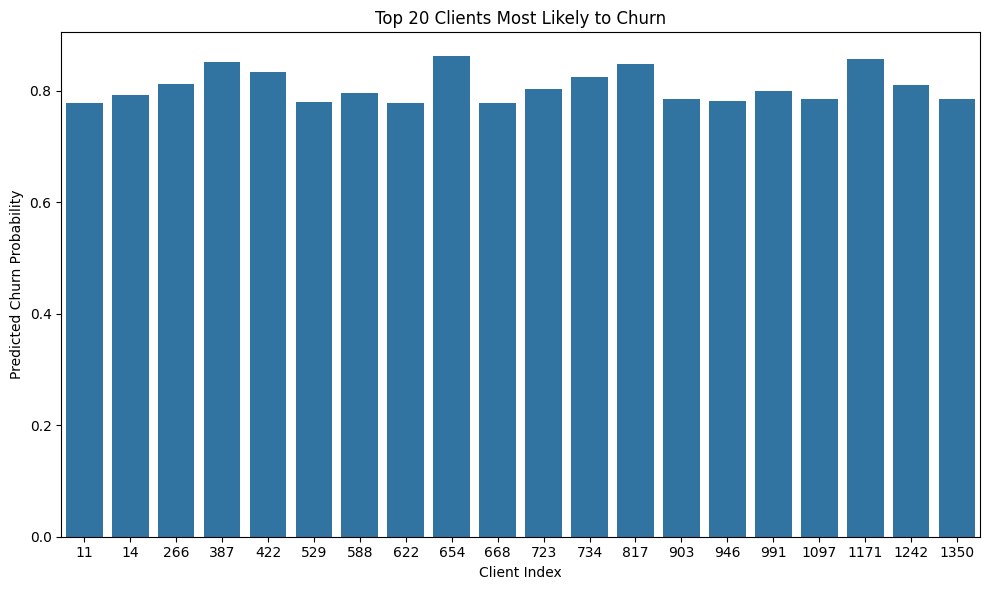

In [ ]:
churn_proba = reglog.predict_proba(X_test)[:, 1]

risk_df = X_test.copy()
risk_df.reset_index(drop=True, inplace=True)
risk_df['Churn_Probability'] = churn_proba
risk_df['Actual_Churn'] = y_test.values

risk_df_sorted = risk_df.sort_values(by='Churn_Probability', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=risk_df_sorted.index[:20], y='Churn_Probability', data=risk_df_sorted[:20])
plt.title('Top 20 Clients Most Likely to Churn')
plt.ylabel('Predicted Churn Probability')
plt.xlabel('Client Index')
plt.tight_layout()
plt.show()

### SHAP


In [ ]:
import shap

In [ ]:
explainer = shap.explainers.Linear(reglog, X_test)
shap_values = explainer(X_test)

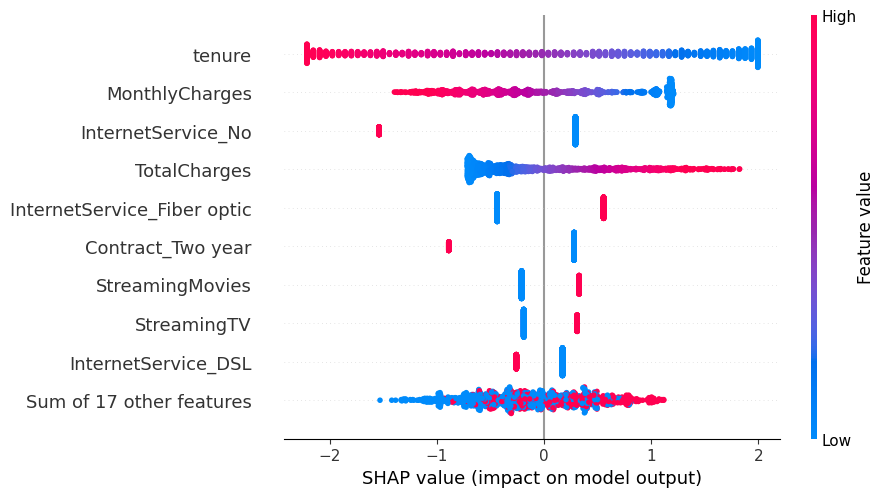

In [ ]:
shap.plots.beeswarm(shap_values)

#### SHAP Summary Interpretation

- **Tenure** has the strongest impact: new customers are significantly more likely to churn.
- **TotalCharges** show that high spenders are at higher risk.
- **Internet service type** and **contract length** are also strong indicators of churn behavior.

The company can use these insights to:
- Focus retention efforts on new and high-paying customers.
- Promote long-term contracts.
- Improve satisfaction for customers using fiber optic services.

Interestingly, SHAP values suggest that high **MonthlyCharges** are associated with **lower churn** in this dataset. It likely reflects that customers with higher monthly fees are often under long-term contracts or use more services — and are thus more loyal.

### Zoom on one guy : 654th in the X_test table

In [ ]:
shap.initjs()
shap.plots.force(shap_values[654])

In this case, the model predicts a **high churn risk** (f(x) = 1.83), mainly due to:
- Short tenure,
- Use of fiber optic internet,
- Multiple services (TV, streaming),
- Not being a 2-year agreement contractor,
- Being a senior.
- High monthly charges.

## App Streamlit :

In [ ]:
import joblib

# Après avoir entraîné ton scaler et préparé X_train
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X_train.columns.tolist(), "features.pkl")

# Et ton modèle :
joblib.dump(reglog,"reg_log_model_churn.pkl")

['/content/drive/MyDrive/Colab Notebooks/reg_log_model_churn.pkl']